## 🧽 **Paso 2: Limpieza y preprocesamiento**

### Cargamos un dataframe `df` con esta estructura:

```python
# Estructura típica
# dt, potencia

dt           potencia
2024-04-01 00:00    0.42
2024-04-01 00:15    0.38
...                ...
```


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("scripts/pipeline_energia_iot/data/consumo_potencia_min.csv", parse_dates=["dt"])
df.set_index("dt", inplace=True)


---

## ✅ 1. Eliminar valores nulos

In [5]:
# Comprobar si hay nulos
print("Valores nulos:\n", df.isnull().sum())

# Eliminar filas con valores nulos
df_clean = df.dropna()

Valores nulos:
 potencia    0
dtype: int64


## ✅ 2. Visualizar la distribución antes de normalizar

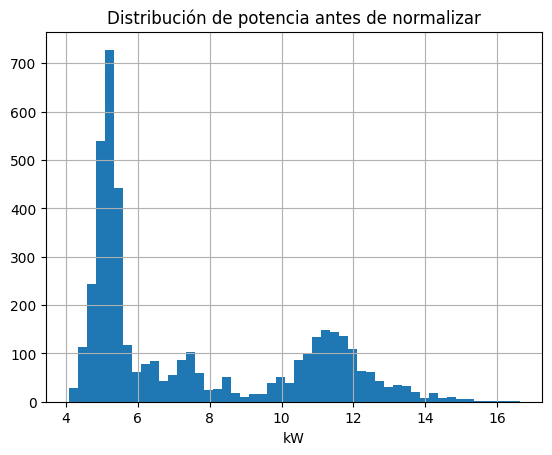

In [6]:
import matplotlib.pyplot as plt

df_clean["potencia"].hist(bins=50)
plt.title("Distribución de potencia antes de normalizar")
plt.xlabel("kW")
plt.show()

## ✅ 3. Normalización (opcional pero recomendable)

La mayoría de modelos de detección de anomalías requieren que los datos estén **escalados**. Usamos `MinMaxScaler` para llevar los valores a un rango \[0, 1].

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_clean["potencia_norm"] = scaler.fit_transform(df_clean[["potencia"]])

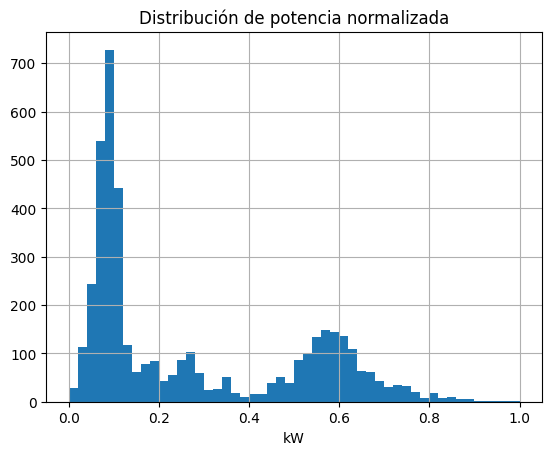

In [8]:
df_clean["potencia_norm"].hist(bins=50)
plt.title("Distribución de potencia normalizada")
plt.xlabel("kW")
plt.show()

✔️ Ahora `df_clean["potencia_norm"]` contiene la versión normalizada.

> 🔐 Guarda el scaler si quieres aplicar el mismo escalado a nuevos datos:

In [10]:
import joblib
joblib.dump(scaler, "scripts/pipeline_energia_iot/models/scaler.pkl")

['scripts/pipeline_energia_iot/models/scaler.pkl']

## ✅ 4. Resultado final

El dataframe listo para entrenamiento tiene esta forma:

| dt           | potencia | potencia\_norm |
| ------------------- | ------------ | ------------- |
| 2024-04-01 00:00:00 | 0.42         | 0.27          |
| 2024-04-01 00:15:00 | 0.38         | 0.22          |
| ...                 | ...          | ...           |

In [15]:
df_clean.head()

,potencia,potencia_norm
dt,,
2025-05-05 00:00:00,5.24,0.093153
2025-05-05 00:01:00,5.00,0.074045
2025-05-05 00:02:00,5.49,0.113057
2025-05-05 00:03:00,4.90,0.066083
2025-05-05 00:04:00,4.89,0.065287


In [16]:
df_clean.describe()

,potencia,potencia_norm
count,4285.000000,4285.000000
mean,7.511624,0.274015
std,2.985191,0.237674
min,4.070000,0.000000
25%,5.130000,0.084395
50%,5.660000,0.126592
75%,10.730000,0.530255
max,16.630000,1.000000


In [19]:
df_clean.to_csv("scripts/pipeline_energia_iot/data/consumo_potencia_min_limpio.csv", index=True)